Importing Libraries

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

Importing Data (More information about data in this website: https://www.kaggle.com/competitions/titanic/data)

In [20]:
Titanic_Train = pd.read_csv("C:/Users/sidli/Downloads/Python_Projects/Machine_Learning_Practice/Data/Titanic_Survival/train.csv")
Titanic_Test = pd.read_csv("C:/Users/sidli/Downloads/Python_Projects/Machine_Learning_Practice/Data/Titanic_Survival/test.csv")

View Train and Test File

In [5]:
print(Titanic_Train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [17]:
print(Titanic_Test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


Columns that do not matter: Name, Ticket, Cabin, Embarked. Remove these columns. (Not doing this until the feature optimization step)
Convert <Sex> column into numbers (<male = 0> and <female = 1>).
Move <Survived> column to the end. 

Initial Data Processing

In [45]:
# 1. Dropping unnecessary columns (Not doing this anymore)
#Titanic_Train_edited = Titanic_Train.drop(columns=["Name", "Ticket", "Cabin", "Embarked"])

# 2. Converting 'Sex' column to numeric (male=0, female=1)
Titanic_Train["Sex"] = Titanic_Train["Sex"].map({"male": 0, "female": 1})

# 3. Moving 'Survived' column to the end
survived_train = Titanic_Train.pop("Survived")
Titanic_Train["Survived"] = survived_train

# 4. Dropping 'Survived' column for now
survived_train_drop = Titanic_Train.drop("Survived", axis=1)

# 5. Replicate for test set
#Titanic_Test_edited = Titanic_Test.drop(columns=["Name", "Ticket", "Cabin", "Embarked"])
Titanic_Test["Sex"] = Titanic_Test["Sex"].map({"male": 0, "female": 1})

# 6. Concatenate train and test sets and reset index
Titanic_Combined = pd.concat([survived_train_drop, Titanic_Test], axis=0, ignore_index=True)

print(survived_train)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [46]:
print(Titanic_Combined.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

   Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    0  22.0      1      0         A/5 21171   7.2500   NaN        S  
1    1  38.0      1      0          PC 17599  71.2833   C85        C  
2    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3    1  35.0      1      0            113803  53.1000  C123        S  
4    0  35.0      0      0            373450   8.0500   NaN        S  


Checking for Missing Values

In [47]:
print(Titanic_Combined.isnull().sum())

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


Note: Age has 263 missing values. Fare has 1 missing value. Embarked has 2 missing values. Cabin has 1014 missing values. 

Visualizing Age Distribution Per Pclass

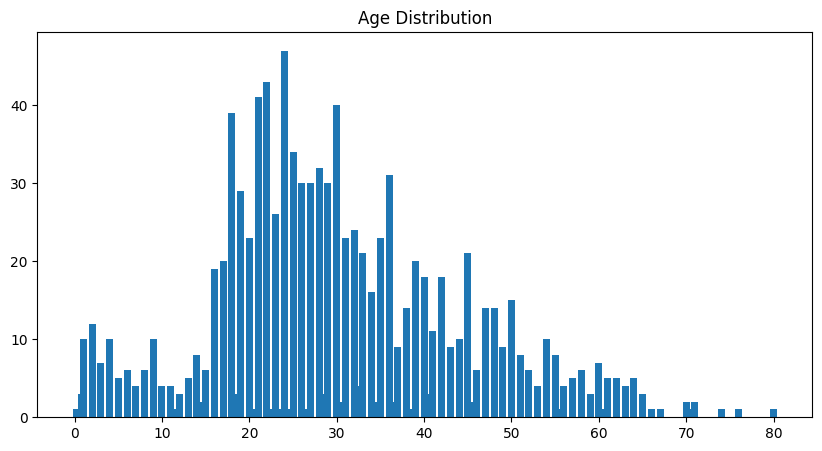

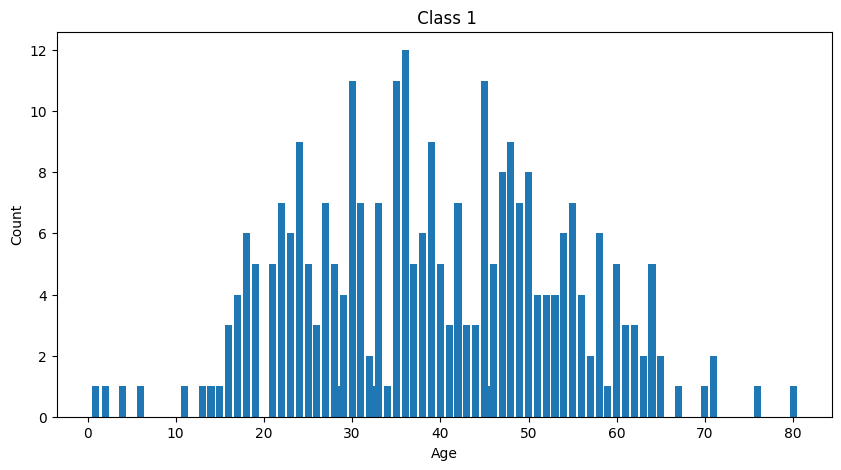

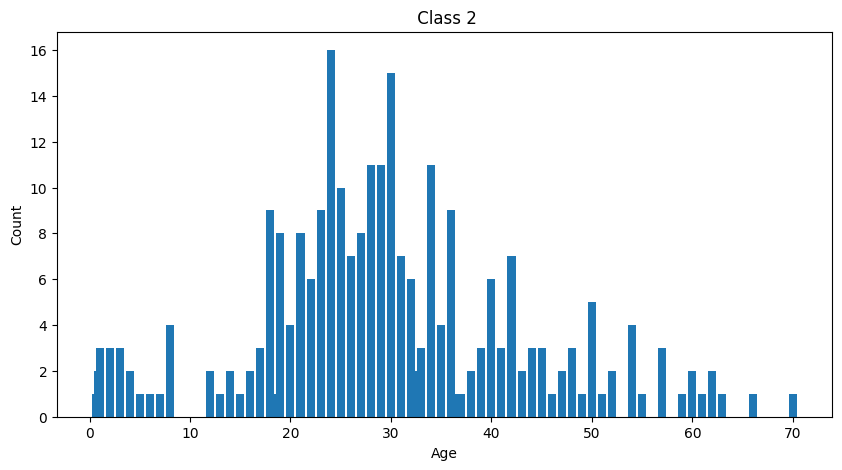

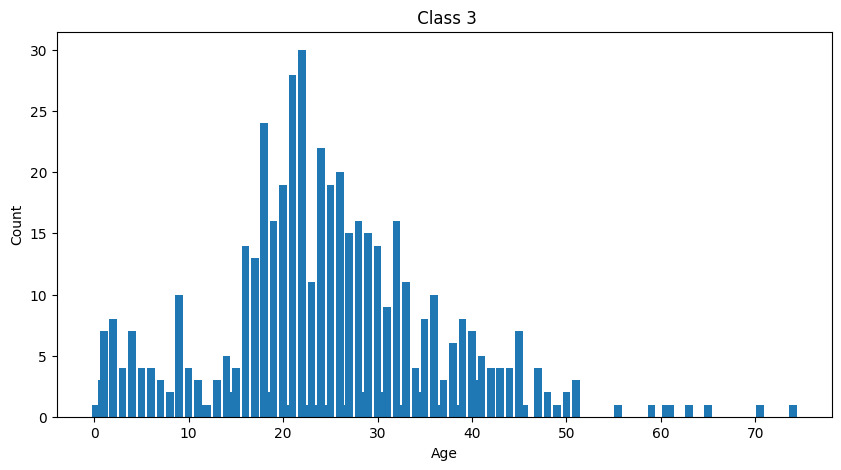

In [41]:
# 4. Visualizing Data

y = Titanic_Combined["Age"].value_counts()
x = y.index.values

plt.figure(figsize=(10, 5))
plt.bar(x, y)
plt.title("Age Distribution")
plt.show()

class_age = Titanic_Combined[["Pclass", "Age"]]

for i in range(1, 4):
    plt.figure(figsize=(10, 5))
    plt.title(" Class " + str(i))
    y = class_age[class_age["Pclass"] == i]["Age"].value_counts()
    x = y.index.values
    plt.bar(x, y)
    plt.xlabel("Age")
    plt.ylabel("Count")
    plt.show()


Plot Two and Plot Three are skewed. We will use medians to infer average ages per class. 

In [42]:
medians = class_age.groupby("Pclass").median()
print(medians)

         Age
Pclass      
1       39.0
2       29.0
3       24.0


Filling in Missing Values

In [43]:
for i in range(3): 
    idx = np.where((Titanic_Combined["Pclass"] == i + 1) & (Titanic_Combined["Age"].isnull()))[0]
    Titanic_Combined.loc[idx, "Age"] = medians.values[i][0]

display(Titanic_Combined)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,3,1,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,3,0,24.0,0,0,8.0500
1305,1306,1,1,39.0,0,0,108.9000
1306,1307,3,0,38.5,0,0,7.2500
1307,1308,3,0,24.0,0,0,8.0500


Checking for Missing Values Again

In [ ]:
print(Titanic_Combined.isnull().sum())